In [24]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer

In [25]:
sd = pd.read_csv('advertising_sales_data.csv', encoding='latin-1')

In [26]:
rows,columns = sd.shape
print(rows, columns)

200 5


In [27]:
print(sd.head())

  Campaign     TV  Radio  Newspaper  Sales
0    camp1  230.1   37.8       69.2   22.1
1    camp2   44.5   39.3       45.1   10.4
2    camp3   17.2   45.9       69.3   12.0
3    camp4  151.5   41.3       58.5   16.5
4    camp5  180.8   10.8       58.4   17.9


In [28]:
print(sd.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Campaign   200 non-null    object 
 1   TV         200 non-null    float64
 2   Radio      198 non-null    float64
 3   Newspaper  200 non-null    float64
 4   Sales      200 non-null    float64
dtypes: float64(4), object(1)
memory usage: 7.9+ KB
None


In [29]:
print(sd.isnull().sum())

Campaign     0
TV           0
Radio        2
Newspaper    0
Sales        0
dtype: int64


In [30]:
sds = sd.dropna()
print(sds.isnull().sum())

Campaign     0
TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64


#1.	What is the average amount spent on TV advertising in the dataset?

In [31]:
tv_amt_avg = sd['TV'].mean()
print("Average amount spent on TV advertising: Rs.", tv_amt_avg)

Average amount spent on TV advertising: Rs. 147.0425


#2. What is the correlation between radio advertising expenditure and product sales?

In [32]:
corr_radio = sds['Radio'].corr(sds['Sales'])
print("Correlation between radio advertising expenditure and product sales: ", corr_radio)

Correlation between radio advertising expenditure and product sales:  0.3497277129207837


#3.	Which advertising medium has the highest impact on sales based on the dataset?

In [33]:
corr_tv = sds['TV'].corr(sds['Sales'])
corr_radio = sds['Radio'].corr(sds['Sales'])
corr_newspaper = sds['Newspaper'].corr(sds['Sales'])
if corr_tv > corr_radio and corr_tv > corr_newspaper:
    print("TV advertising has the highest impact on sales.")
elif corr_radio > corr_tv and corr_radio > corr_newspaper:
    print("Radio advertising has the highest impact on sales.")
else:
    print("Newspaper advertising has the highest impact on sales.")

TV advertising has the highest impact on sales.


#4.	Plot a linear regression line that includes all variables (TV, Radio, Newspaper) to predict Sales, and visualize the model's predictions against the actual sales values

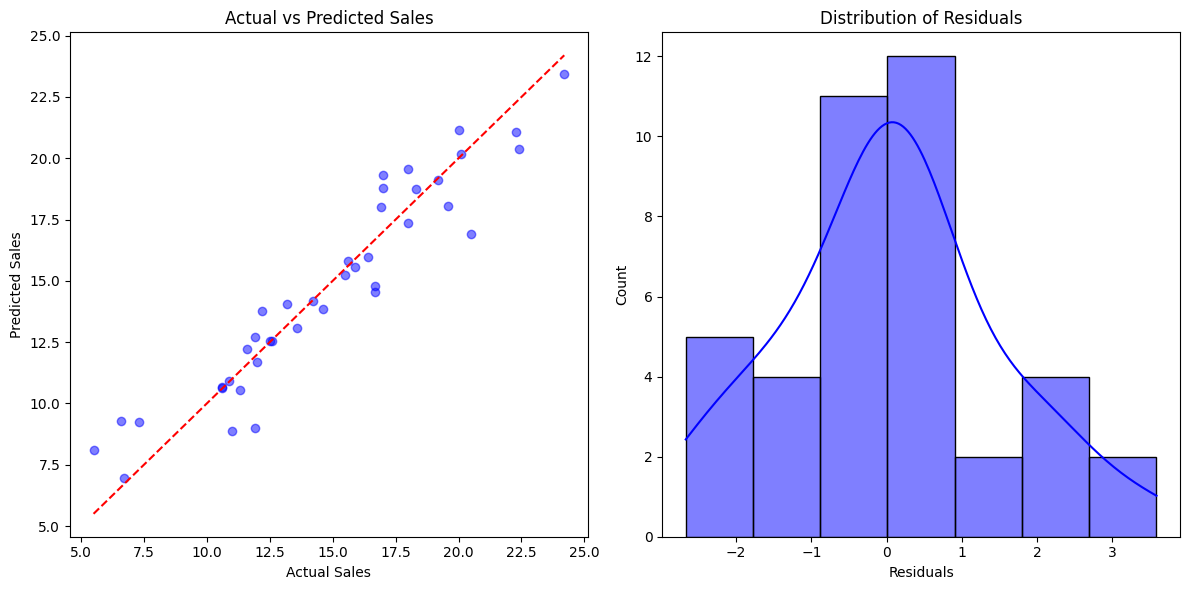

Mean Squared Error: 2.0186238976489776
R^2 Score: 0.89910282638328


In [34]:
X = sds[['TV', 'Radio', 'Newspaper']]
y = sds['Sales']

imputer = SimpleImputer(strategy='mean')
X = imputer.fit_transform(X)

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the model
model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

# Plotting actual vs predicted sales
plt.figure(figsize=(12, 6))

# Plot predicted vs actual sales
plt.subplot(1, 2, 1)
plt.scatter(y_test, y_pred, color='blue', alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')
plt.xlabel('Actual Sales')
plt.ylabel('Predicted Sales')
plt.title('Actual vs Predicted Sales')

# Plot residuals
plt.subplot(1, 2, 2)
residuals = y_test - y_pred
sns.histplot(residuals, kde=True, color='blue')
plt.xlabel('Residuals')
plt.title('Distribution of Residuals')

plt.tight_layout()
plt.show()

# Print evaluation metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Mean Squared Error: {mse}")
print(f"R^2 Score: {r2}")

#5.	How would sales be predicted for a new set of advertising expenditures : $200 on TV, $40 on Radio, and $50 on Newspaper?

In [35]:
X = sds[['TV', 'Radio', 'Newspaper']]
y = sds['Sales']

imputer = SimpleImputer(strategy='mean')
X = imputer.fit_transform(X)

# Splitting data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# TV: $200, Radio: $40, Newspaper: $50
new_ad_expenditures = [[200, 40, 50]]

# prediction for new values
predicted_sales = model.predict(new_ad_expenditures)

print(f"Predicted Sales for $200 on TV, $40 on Radio, and $50 on Newspaper: {predicted_sales[0]:.2f}")

Predicted Sales for $200 on TV, $40 on Radio, and $50 on Newspaper: 19.82


#6.	How does the performance of the linear regression model change when the dataset is normalized?

In [36]:
X = sds[['TV', 'Radio', 'Newspaper']]
y = sds['Sales']

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

imputer = SimpleImputer(strategy='mean')
X_train = imputer.fit_transform(X_train)
X_test = imputer.transform(X_test)

# Train the model on the unnormalized data
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

mse_unnormalized = mean_squared_error(y_test, y_pred)
r2_unnormalized = r2_score(y_test, y_pred)

print(f"Unnormalized Data - MSE: {mse_unnormalized:.2f}, R²: {r2_unnormalized:.2f}")

# Normalize the feature data using StandardScaler
from sklearn.preprocessing import StandardScaler #Import the StandardScaler module
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train the model on the normalized data
model_normalized = LinearRegression()
model_normalized.fit(X_train_scaled, y_train)
y_pred_scaled = model_normalized.predict(X_test_scaled)

# Performance on the normalized data
mse_normalized = mean_squared_error(y_test, y_pred_scaled)
r2_normalized = r2_score(y_test, y_pred_scaled)

print(f"Normalized Data - MSE: {mse_normalized:.2f}, R²: {r2_normalized:.2f}")

Unnormalized Data - MSE: 2.02, R²: 0.90
Normalized Data - MSE: 2.02, R²: 0.90


#7.	What is the impact on the sales prediction when only radio and newspaper advertising expenditures are used as predictors?

In [38]:
X = sds[['TV', 'Radio', 'Newspaper']]
y = sds['Sales']

X_train_all, X_test_all, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

imputer = SimpleImputer(strategy='mean')
X_train_all = imputer.fit_transform(X_train_all)
X_test_all = imputer.transform(X_test_all)

model_all = LinearRegression()
model_all.fit(X_train_all, y_train)
y_pred_all = model_all.predict(X_test_all)

mse_all = mean_squared_error(y_test, y_pred_all)
r2_all = r2_score(y_test, y_pred_all)

print(f"Model with TV, Radio, and Newspaper - MSE: {mse_all:.2f}, R²: {r2_all:.2f}")

X_radio_newspaper = sds[['Radio', 'Newspaper']]
X_train_rn, X_test_rn, y_train_rn, y_test_rn = train_test_split(X_radio_newspaper, y, test_size=0.2, random_state=42)

# Apply the imputer to X_train_rn and X_test_rn
X_train_rn = imputer.fit_transform(X_train_rn)
X_test_rn = imputer.transform(X_test_rn)

model_rn = LinearRegression()
model_rn.fit(X_train_rn, y_train_rn)
y_pred_rn = model_rn.predict(X_test_rn)

mse_rn = mean_squared_error(y_test_rn, y_pred_rn)
r2_rn = r2_score(y_test_rn, y_pred_rn)

print(f"Model with Radio and Newspaper - MSE: {mse_rn:.2f}, R²: {r2_rn:.2f}")


Model with TV, Radio, and Newspaper - MSE: 2.02, R²: 0.90
Model with Radio and Newspaper - MSE: 21.05, R²: -0.05


#Other Insights

In [ ]:
tv_amt_avg = sd['TV'].mean()
print("Average amount spent on TV advertising: Rs.", tv_amt_avg)
radio_amt_avg = sd['Radio'].mean()
print("Average amount spent on Radio advertising: Rs.", radio_amt_avg)
newspaper_amt_avg = sd['Newspaper'].mean()
print("Average amount spent on Newspaper advertising: Rs.", newspaper_amt_avg)

In [ ]:
tot_amt_TV = sd['TV'].sum()
print("Total amount spent on TV advertising: Rs.", tot_amt_TV)
tot_amt_Radio = sd['Radio'].sum()
print("Total amount spent on Radio advertising: Rs.", tot_amt_Radio)
tot_amt_Newspaper = sd['Newspaper'].sum()
print("Total amount spent on Newspaper advertising: Rs.", tot_amt_Newspaper)


In [ ]:
sns.histplot(sd['Sales'])
plt.xlabel('Units Sold')
plt.ylabel('Frequency')
plt.title('Distribution of Sales')